In [1]:
# Data Manupulation
import numpy as np
import pandas as pd

# Techinical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

# logistic regression
from sklearn.linear_model import LogisticRegression

# svm
from sklearn import svm, preprocessing

In [2]:
# data
data = pd.read_csv('training_data.csv')
data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


C:\Users\Mimori\Anaconda3\envs\FDA\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


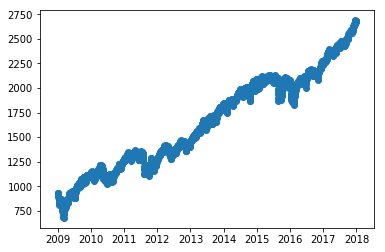

In [3]:
dates = [pd.Timestamp(date) for date in data['Date']]
closes = np.array(data['Close Price'],dtype='float')
plt.scatter(dates, closes)
plt.show()

In [4]:
# 原本的資料直接訓練
file_name = 'training_data.csv'
df = pd.read_csv(file_name, index_col=0)
x_train = df
y_train = np.where (df['Close Price'].shift(-1) > df['Close Price'],1,-1)

In [5]:
x_train.head()

,Open Price,Close Price,High Price,Low Price,Volume
Date,,,,,
02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [6]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{-1: 1028, 1: 1236}

In [7]:
file_name = 'testing_data.csv'
df_test = pd.read_csv(file_name, index_col=0)
x_test = df_test
y_test = np.where (df_test['Close Price'].shift(-1) > df_test['Close Price'],1,-1)

In [8]:
x_test.head()

,Open Price,Close Price,High Price,Low Price,Volume
Date,,,,,
02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232
03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328
04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744
05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120
08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936


In [9]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{-1: 121, 1: 131}

In [10]:
# logistic regression
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

C:\Users\Mimori\Anaconda3\envs\FDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


印出模型係數 model.coef_

In [11]:
pd.DataFrame(zip(x_train.columns, np.transpose(lg_model.coef_)))

,0,1
0,Open Price,[3.0723787994412094e-17]
1,Close Price,[3.048806635293544e-17]
2,High Price,[3.075972091600277e-17]
3,Low Price,[3.0469745364168135e-17]
4,Volume,[5.558556099677488e-11]


利用predict_proba函式來計算丟進x_test之後得到的y=1或y=-1的機率
印出前20個來看一下結果

右邊的機率代表的是預測y=1的機率
左邊的機率代表的是預測y=-1的機率

In [12]:
probability = lg_model.predict_proba(x_test)
print(probability[:20])

[[0.47436333 0.52563667]
 [0.47098092 0.52901908]
 [0.47084004 0.52915996]
 [0.4733599  0.5266401 ]
 [0.4736931  0.5263069 ]
 [0.47282789 0.52717211]
 [0.47155887 0.52844113]
 [0.47253239 0.52746761]
 [0.47073402 0.52926598]
 [0.46487043 0.53512957]
 [0.4672659  0.5327341 ]
 [0.46934991 0.53065009]
 [0.46704718 0.53295282]
 [0.47101436 0.52898564]
 [0.47015851 0.52984149]
 [0.46682009 0.53317991]
 [0.46821626 0.53178374]
 [0.47003176 0.52996824]
 [0.47103893 0.52896107]
 [0.46753038 0.53246962]]


In [13]:
predicted = lg_model.predict(x_test)
print(predicted[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


利用函式畫出confusion matrix，可以看到實際是-1，但預測是1的有121個、實際是1，預測也是1的有131個
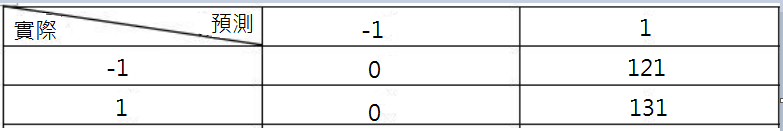

In [14]:
print(metrics.confusion_matrix(y_test, predicted))

[[  0 121]
 [  0 131]]


利用測試資料幫模型算出來的預測準確率大約是0.52

In [15]:
print(lg_model.score(x_test, y_test))

0.5198412698412699


讓模型根據前面預測出來的機率來猜測試資料的前20筆資料，可以看到因為猜測是1的機率都比較高，所以最後模型都猜1

但把全部都印出來看以後發現，模型的每一個預測都是1，只能說看來我們這一次的模型訓練並沒有成功。

logistic regression適合且只能處理二元的分類問題，所以在這一個條件上，是符合我們的要求的。但logistic regression處理的問題必須要是線性可分的問題，我猜可能是我們這次作業的資料不太算是線性可分的資料，所以才沒有辦法利用logistic regression做到效果好的分類。
再來試試看SVM。

## SVM

記得是是看x_2 = preprocessing.scale(x_train)

svm有一些不一樣的kernel function，用來幫助資料轉換到高維度的面上。不同的kernel function有不同的使用時機，這裡選擇了三種來做測試，分別是polynomial, sigmoid, rdf。另外常用的kernel還有linear，但因為我們這次的資料好像不太適合，試了之後發現跑了很久還是跑不完，就放棄沒有拿來用了。

kernel的使用時機 : 


linear : 適合linear separable dataset，效果與Logistic
Regression類似，與其它SVM kernel比較起來執
行速度較快。

polynomial : 適合non-linear separable dataset

sigmoid : 類似Logistic Regression的二元分類

rbf : 沒有指定的話就預設是rbf，適合non-linear separable dataset


In [30]:
# poly
svm_model_p = svm.SVC(C = 0.05,kernel='poly', probability=True)
svm_model_p.fit(x_train, y_train)
probability = svm_model_p.predict_proba(x_test)
print(probability[:20])
print(lg_model.score(x_test, y_test))

[[3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]]
0.5198412698412699


C:\Users\Mimori\Anaconda3\envs\FDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
# sigmoid
svm_model_s = svm.SVC(C = 0.05, kernel='sigmoid', probability=True)
svm_model_s.fit(x_train, y_train)
probability = svm_model_s.predict_proba(x_test)
print(probability[:20])
print(lg_model.score(x_test, y_test))

C:\Users\Mimori\Anaconda3\envs\FDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]
 [0.45402548 0.54597452]]
0.5198412698412699


In [32]:
# rbf
svm_model_r = svm.SVC(C = 0.05, kernel='rbf', probability=True)
svm_model_r.fit(x_train, y_train)
probability = svm_model_r.predict_proba(x_test)
print(probability[:20])
print(lg_model.score(x_test, y_test))

C:\Users\Mimori\Anaconda3\envs\FDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]
 [0.45460192 0.54539808]]
0.5198412698412699


可以看到一開始測試的polynomial效果最極端，猜測是1的機率幾乎等於1。另外兩個的機率看起來還算比較正常一點。但是每一筆資料的機率算出來都是一樣的，也就是這個模型基本上不能用。從這三個kernel跑出來的結果來看，效果都不太理想。猜測可能的原因有可能是因為參數的調整不夠完善，才導致這樣的結果。但是SVM其中一個重要且經常使用的參數就是kernel，如果試過這些kernel都沒有辦法跑出好的結果，可能就是這樣的資料並不適合svm，又或者這些資料本身就沒有辦法用來預測我們設置的target，也就是特徵不夠多或不夠重要。

最後是neural network

## neural network